<a href="https://colab.research.google.com/github/Kirknasty54/Jackson_Kirkpatrick_ICP6/blob/main/Jackson_Kirkpatrick_ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from google.colab import drive
drive.mount('/content/gdrive')
path_to_csv = '/content/gdrive/MyDrive/diabetes(1) (1).csv'
import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
dataset = pd.read_csv(path_to_csv, header = None).values

x_train, x_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
nn = Sequential()
nn.add(Dense(20, input_dim=8, activation='relu'))
nn.add(Dense(21, input_dim=8, activation='relu'))
nn.add(Dense(22, input_dim=8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
nn.fit(x_train, y_train, epochs = 100, initial_epoch = 0)
print(nn.summary())
print(nn.evaluate(x_test, y_test))

Epoch 1/100
18/18 [==============================] - 1s 3ms/step - loss: 4.6316 - acc: 0.4427
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 1.5036 - acc: 0.6649
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.9990 - acc: 0.6510
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8542 - acc: 0.6597
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.8207 - acc: 0.6597
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7287 - acc: 0.6597
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7229 - acc: 0.6510
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6522 - acc: 0.6806
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6372 - acc: 0.6719
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6057 - acc: 0.6979
Epoch 11/100
18/18 [==============================] - 0s 2m

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 8s 31ms/step - loss: 1.3589 - accuracy: 0.6135 - val_loss: 0.7088 - val_accuracy: 0.8337
Epoch 2/10
235/235 [==============================] - 9s 39ms/step - loss: 0.4897 - accuracy: 0.8778 - val_loss: 0.3804 - val_accuracy: 0.8980
Epoch 3/10
235/235 [==============================] - 9s 38ms/step - loss: 0.3372 - accuracy: 0.9043 - val_loss: 0.3079 - val_accuracy: 0.9128
Epoch 4/10
235/235 [==============================] - 8s 35ms/step - loss: 0.2764 - accuracy: 0.9209 - val_loss: 0.2511 - val_accuracy: 0.9286
Epoch 5/10
235/235 [==============================] - 11s 47ms/step - loss: 0.2355 - accuracy: 0.9321 - val_loss: 0.2289 - val_accuracy: 0.9337
Epoch 6/10
235/235 [==============================] - 8s 32ms/step - loss: 0.2051 - accuracy: 0.9402 - val_loss: 0.1966 - val_accuracy: 0.9411
Epoch 7/10
235/235 [==============================] - 9s 40ms/step - loss: 0.1804 - accuracy: 0.9476 - val_loss: 0.1709 - val_ac

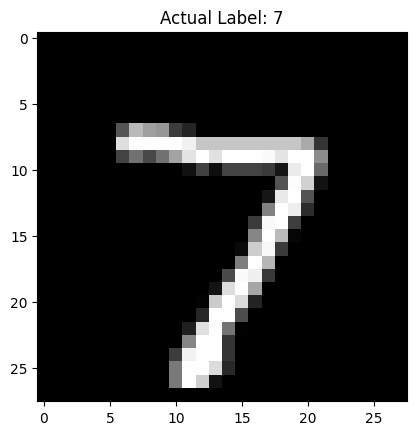

In [38]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
#model.add(Dense(512, activation='relu', input_shape=(dimData,)))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(500, activation='sigmoid'))
model.add(Dense(34, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
img_idx = 0
sample_img = test_data[img_idx].reshape(28, 28)
plt.imshow(sample_img, cmap='gray')
plt.title(f'Actual Label: {test_labels[img_idx]}')
plt.show()